###	Processed Data Importing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
eurobank = pd.read_csv('processed_data.csv')

In [ ]:
print("\nVerifying the loaded processed data:")
eurobank.head()


Verifying the loaded processed data:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no


### Aggregate the total counts for 'yes' and 'no' subscriptions

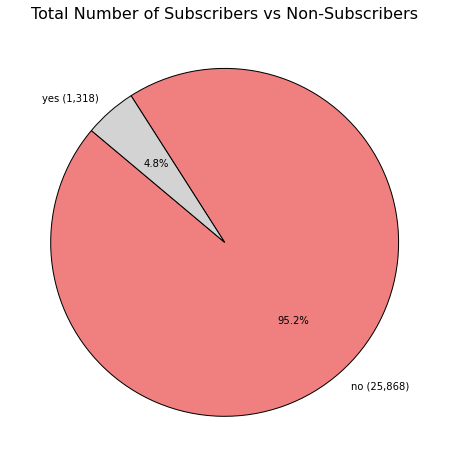

In [ ]:
subscription_counts = eurobank['y'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(subscription_counts,
        labels=[f"{label} ({count:,})" for label, count in zip(subscription_counts.index, subscription_counts)],
        autopct='%1.1f%%',
        colors=['lightcoral', 'lightgrey'],
        startangle=140,
        wedgeprops={'edgecolor': 'black'})

plt.title('Total Number of Subscribers vs Non-Subscribers', fontsize=16)

plt.show()

###  Subscribers by Education

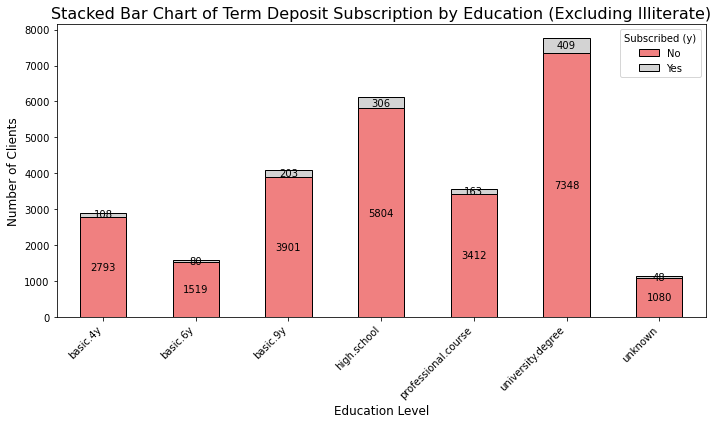

In [ ]:
# Filter out the 'illiterate' category from the education column
eurobank_filtered = eurobank[eurobank['education'] != 'illiterate']

# Grouping the data by education and the target variable (y) to count subscribers and non-subscribers
education_counts = eurobank_filtered.groupby(['education', 'y']).size().unstack()

ax = education_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightcoral', 'lightgrey'], edgecolor='black')

plt.title('Stacked Bar Chart of Term Deposit Subscription by Education (Excluding Illiterate)', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)
plt.legend(title='Subscribed (y)', labels=['No', 'Yes'])
plt.xticks(rotation=45, ha='right')

for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.tight_layout()
plt.show()

###  Subscribers by Education Level and Subscription Status

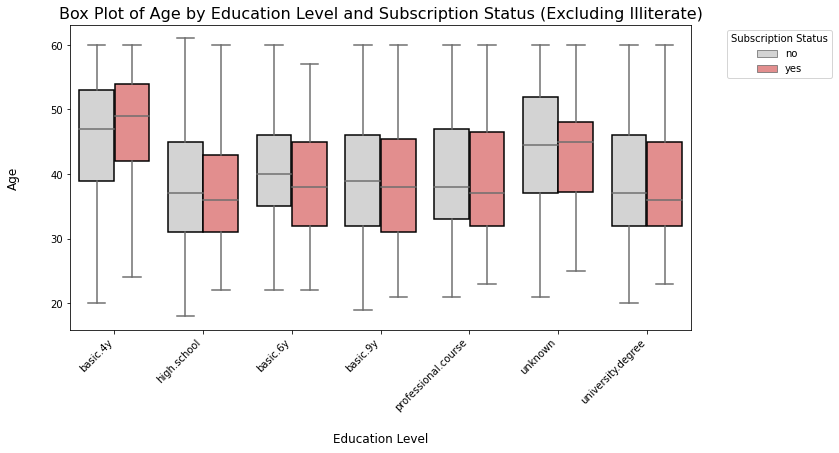

In [ ]:
# 3.Filter out the 'illiterate' category from the education column
eurobank_filtered = eurobank[eurobank['education'] != 'illiterate']

plt.figure(figsize=(14, 8))
box_plot = sns.boxplot(x='education', y='age', hue='y', data=eurobank_filtered,
                       palette={'yes': 'lightcoral', 'no': 'lightgrey'},
                       boxprops=dict(edgecolor='black', linewidth=1.5))  # Add borders to the boxes

plt.title('Box Plot of Age by Education Level and Subscription Status (Excluding Illiterate)', fontsize=16)

plt.xlabel('Education Level', fontsize=12, labelpad=20)
plt.ylabel('Age', fontsize=12, labelpad=20)
plt.gca().yaxis.set_label_position('left')
plt.gca().yaxis.labelpad = 30

plt.xticks(rotation=45, ha='right')
plt.tight_layout(rect=[0.15, 0.1, 0.85, 0.9])

plt.legend(title='Subscription Status', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Calculate median and mean values
medians = eurobank_filtered.groupby(['education', 'y'])['age'].median().reset_index()
means = eurobank_filtered.groupby(['education', 'y'])['age'].mean().reset_index()

for i, box in enumerate(box_plot.artists):
    # Find the median value for the current box
    med_val = medians.iloc[i // 2]['age']
    # Annotate the median value in the box plot
    box_plot.text(i // 2, med_val, f'{med_val:.1f}', color='black', ha='center', va='center', fontweight='bold')

    mean_val = means.iloc[i // 2]['age']

    box_plot.text(i // 2, mean_val, f'{mean_val:.1f}', color='red', ha='center', va='center', fontweight='bold')

plt.show()

### Subscribers by Jobs

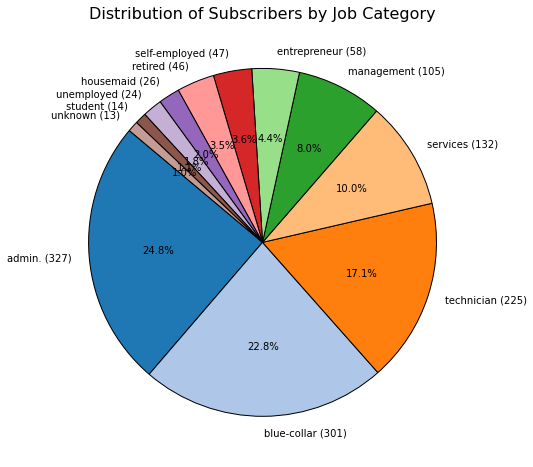

In [ ]:
#Filter out the rows where the subscription status is 'yes'
subscribers = eurobank[eurobank['y'] == 'yes']

# Aggregate the number of subscribers by job
job_counts = subscribers['job'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(job_counts,
        labels=[f"{job} ({count:,})" for job, count in job_counts.items()],
        autopct='%1.1f%%',
        colors=plt.get_cmap('tab20').colors,
        startangle=140,
        wedgeprops={'edgecolor': 'black'})

plt.title('Distribution of Subscribers by Job Category', fontsize=16)

plt.show()